In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

create_profiling = False

/storage/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv('../../data/Vierlinden/Vierlinden_2021_All.csv')
target_data = pd.read_csv('../../data/Vierlinden/overflow_Vierlinden_2021.csv')

# Convert to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])
target_data['Timestamp'] = pd.to_datetime(target_data['Timestamp'])

# Fill NaN values in target data with 0
target_data['Kaiserstr_outflow [l/s]'] = target_data['Kaiserstr_outflow [l/s]'].fillna(0)
target_data['Kreuzweg_outflow [l/s]'] = target_data['Kreuzweg_outflow [l/s]'].fillna(0)

# Merge
merged_data = pd.merge(data, target_data, left_on='Datetime', right_on='Timestamp', how='left')
merged_data.drop(columns=['Timestamp'], inplace=True)

# Save the merged data to a csv file
merged_data.to_csv('../../data/Vierlinden/Vierlinden_All_with_Target.csv', index=False)

merged_data.head()

,Datetime,FLP_Hohenstand_Pumpensumpf_pval,FLP_Strom_P3_pval,FLP_Strom_P4_pval,FLP_Strom_P5_pval,Durchfluss SWP1 und SWP2_pval,FLP_Hohenstand_Becken1_pval,FLP_Hohenstand_Becken3_pval,FLP_Hohenstand_Beckne2_pval,Schieber Position_pval,...,Strom Pumpe 2_pval1,Strom Pumpe 3_pval,Niederschlag,Füllstand_RRB,Entleerung_RüB,Füllstand_RüB_1,Füllstand_RüB_2,Füllstand_RüB_3,Kreuzweg_outflow [l/s],Kaiserstr_outflow [l/s]
0,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,0.0,1.0,0.0,1.47,0.098,3.16,3.08,2.72,0.059073,0.0
1,2021-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,0.0,1.0,NaN,1.47,0.099,3.16,3.08,2.72,0.000000,0.0
2,2021-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,0.0,1.0,NaN,1.47,0.096,3.16,3.08,2.72,0.000000,0.0
3,2021-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,0.0,1.0,NaN,1.47,0.098,3.16,3.08,2.72,2.263329,0.0
4,2021-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,0.0,1.0,NaN,1.47,0.098,3.16,3.08,2.72,0.000000,0.0


In [3]:
if create_profiling:
    profile = ProfileReport(merged_data, title='Vierlinden 2021', explorative=True)
    profile.to_file('../data_profilings/Vierlinden_Profiling_Report_With_Target.html')
else:
    print('No Profling Report created')

Summarize dataset:  89%|████████▊ | 39/44 [00:00<00:00, 32.04it/s, Calculate auto correlation]                       /storage/.venv/lib/python3.10/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7f83e644e4a0, file "/storage/.venv/lib/python3.10/site-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 164>')
  warnings.warn(
Summarize dataset: 100%|█████████▉| 1338/1343 [03:00<00:01,  2.88it/s, Missing diagram heatmap]                                                /storage/.venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed

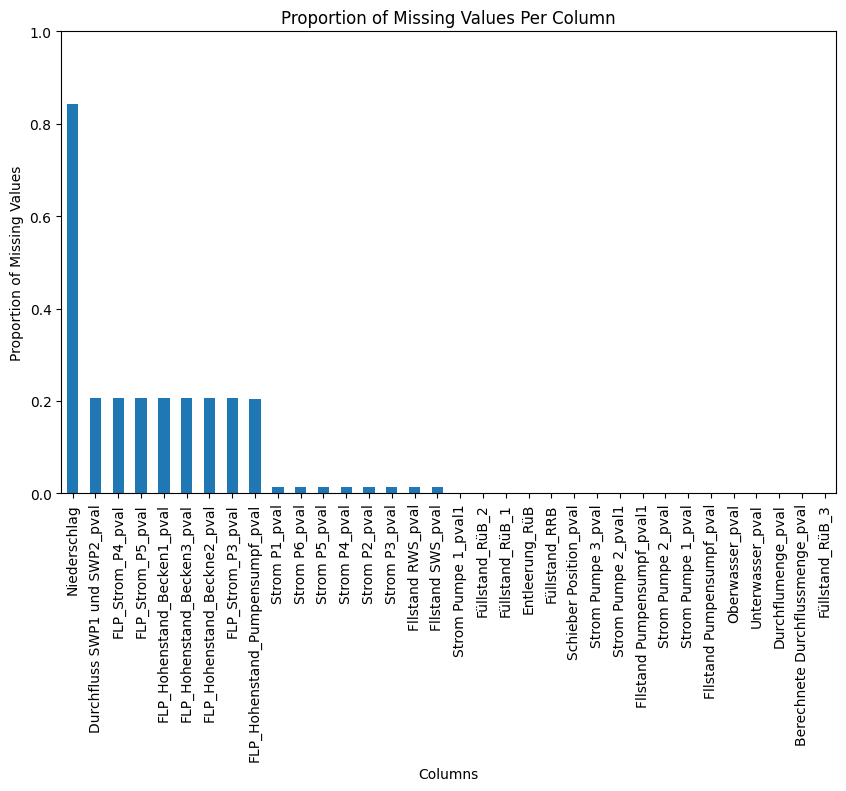

In [4]:
data = pd.read_csv('../../data/Vierlinden/Vierlinden_All_with_Target.csv')

# Calculate the proportion of missing values per column
missing_proportions = data.isnull().mean()  # mean() calculates the proportion of NaNs

# Filter out columns that have no missing values
missing_proportions = missing_proportions[missing_proportions > 0]

# Sort the series for better visualization
missing_proportions.sort_values(ascending = False, inplace = True)

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_proportions.plot(kind='bar')

# Adding titles and labels
plt.title('Proportion of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values')

# Set the y-axis to range from 0 to 1
plt.ylim(0, 1)

# Show the plot
plt.show()

Set NaNs in 'Niederschlag' column to 0 since it was probably not raining

In [5]:
# Fill Niederschlag values in data with 0
data['Niederschlag'] = data['Niederschlag'].fillna(0)

complete_data = data.dropna()

# Calculate the proportion of removed data
removed_proportion = 1 - (len(complete_data) / len(data))
removed_absolute = len(data) - len(complete_data)
print('Proportion of data rows with NaNs: {:.2f}'.format(removed_proportion))
print('Absolute number of data rows with NaNs: {:.0f}/{:.0f}'.format(removed_absolute, len(data)))

Proportion of data rows with NaNs: 0.21
Absolute number of data rows with NaNs: 1843/8760


In [6]:
# Remove columns with high proportion of missing values
data_with_removed_highnans = data.drop(["Durchfluss SWP1 und SWP2_pval",
                                        "FLP_Hohenstand_Pumpensumpf_pval",
                                        "FLP_Strom_P3_pval",
                                        "FLP_Strom_P4_pval",
                                        "FLP_Strom_P5_pval",
                                        "FLP_Hohenstand_Becken1_pval",
                                        "FLP_Hohenstand_Becken3_pval",
                                        "FLP_Hohenstand_Beckne2_pval"], axis=1)

complete_data = data_with_removed_highnans.dropna()

# Calculate the proportion of rows with missing values
removed_proportion = 1 - (len(complete_data) / len(data))
removed_absolute = len(data) - len(complete_data)
print('Proportion of data rows with NaNs: {:.2f}'.format(removed_proportion))
print('Absolute number of data rows with NaNs: {:.0f}/{:.0f}'.format(removed_absolute, len(data)))

Proportion of data rows with NaNs: 0.01
Absolute number of data rows with NaNs: 124/8760


In [1]:
# Create a dataframe indicating where data is missing
missing = data_with_removed_highnans.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the missing data
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='viridis')

# Optional: customize the plot, e.g., setting a title
plt.title('Nullity Matrix')

# Show the plot
plt.show()

NameError: name 'data_with_removed_highnans' is not defined

We see that at the beginning of the time series data we have many NaNs in the sensory data.
So I will remove the first rows that contain NaNs since we still we still will have a continuous time series.

In fact the first 3 days (until 2021-01-04 06:00:00) have missing sensory data.

The date of the first complete row is: 2021-01-04 06:00:00


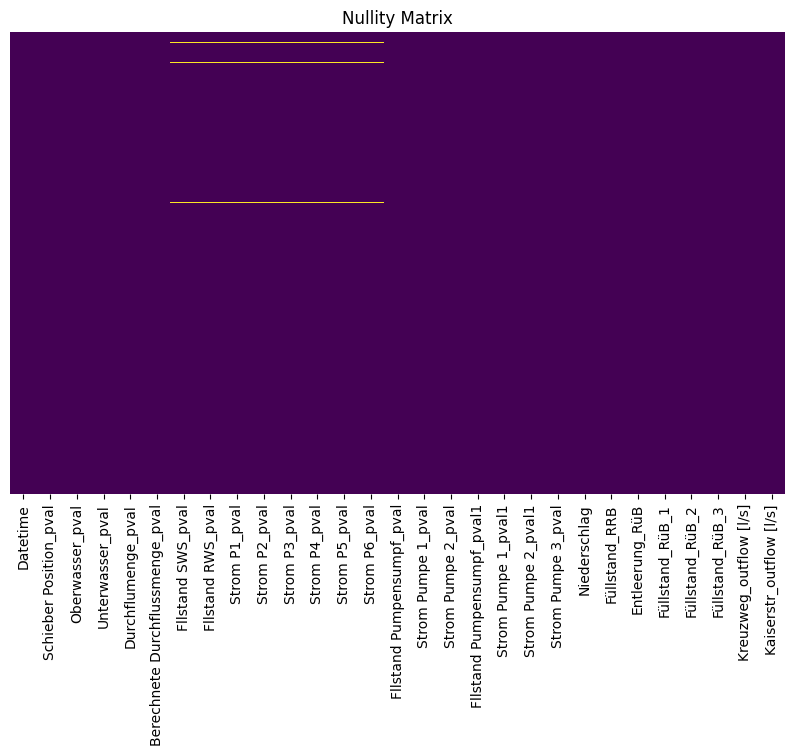

In [25]:
# Find the first index where all columns have non-missing data
first_valid_index = data_with_removed_highnans.dropna().index[0]
print('The date of the first complete row is: {}'.format(data_with_removed_highnans.loc[first_valid_index, 'Datetime']))

trimmed_data = data_with_removed_highnans.loc[first_valid_index:, :]

# Create a dataframe indicating where data is missing
missing = trimmed_data.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the missing data
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='viridis')

# Optional: customize the plot, e.g., setting a title
plt.title('Nullity Matrix')

# Show the plot
plt.show()

Now there are a couple of occurences in the middle where we have missing sensory data.
To not lose the continuity of the time series I will fill these gaps with linear interpolation.

In [26]:
# Impute the missing values using linear interpolation
# For this it is important that the timeseries is evenly spaced
complete_data = trimmed_data.interpolate(method='linear')
complete_data['Datetime'] = pd.to_datetime(complete_data['Datetime'])

# Save the complete data to a csv file
complete_data.to_csv('../../data/Vierlinden/Vierlinden_2021_Complete.csv', index=False)

/tmp/ipykernel_2024/3850101567.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  complete_data = trimmed_data.interpolate(method='linear')


In [ ]:
if create_profiling:
    profile = ProfileReport(complete_data, title='Vierlinden 2021 Complete Data', explorative=True)
    profile.to_file('../data_profilings/Vierlinden_Profiling_Report_No_NaNs.html')
else:
    print('No Profling Report created')

Now that the missing values are imputed we can focus on feature engineering.

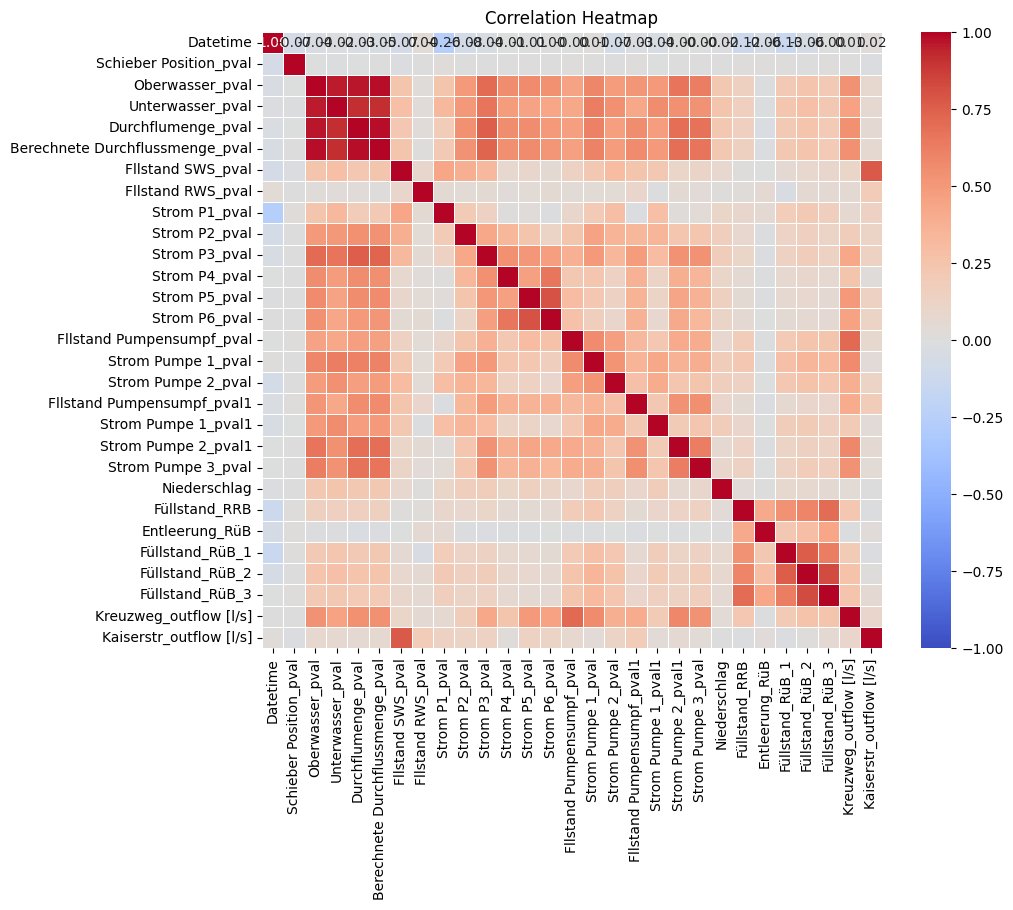

In [27]:
# Calculate the correlation matrix
corr_matrix = complete_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=-1, vmax=1)

# Add titles and labels if needed
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# Use linear regression first to evaluate linear importance of the features
X = complete_data.drop(['Datetime', 
                        'Füllstand_RRB', 
                        'Entleerung_RüB', 
                        'Füllstand_RüB_1', 
                        'Füllstand_RüB_2', 
                        'Füllstand_RüB_3',
                        'Kreuzweg_outflow [l/s]',
                        'Kaiserstr_outflow [l/s]'], 
                       axis=1)
y1 = complete_data['Kreuzweg_outflow [l/s]']
y2 = complete_data['Kaiserstr_outflow [l/s]']

# Split the data into training and test sets
train_size = int(len(complete_data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y1_train, y1_test = y1[:train_size], y1[train_size:]
y2_train, y2_test = y2[:train_size], y2[train_size:]

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model1 = LinearRegression()
model2 = LinearRegression()
model1.fit(X_train, y1_train)
model2.fit(X_train, y2_train)

# Evaluate model1
print('Model 1 fitted for Kreuzweg:')
y_pred = model1.predict(X_test)
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y1_test, y_pred)))

# Feature importance through the coefficiencts for m1
importance1 = pd.DataFrame({'Feature': X.columns, 'Coefficient': model1.coef_})\
                        .assign(Absolute_Coefficient=lambda df: df['Coefficient'].abs())\
                        .sort_values(by='Absolute_Coefficient', ascending=False)\
                        .reset_index(drop=True)
print("Feature importance through the coefficients:")
display(importance1[['Feature', 'Coefficient']])

# Evaluate model2
print('\nModel 2 fitted for Kaiserstr:')
y_pred = model2.predict(X_test)
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y2_test, y_pred)))

# Feature importance through the coefficiencts for m2
importance2 = pd.DataFrame({'Feature': X.columns, 'Coefficient': model2.coef_})\
                        .assign(Absolute_Coefficient=lambda df: df['Coefficient'].abs())\
                        .sort_values(by='Absolute_Coefficient', ascending=False)\
                        .reset_index(drop=True)
print("Feature importance through the coefficients:")
display(importance2[['Feature', 'Coefficient']])

Model 1 fitted for Kreuzweg:
Mean Absolute Error: 36.73
Feature importance through the coefficients:


,Feature,Coefficient
0,Oberwasser_pval,150.524798
1,Berechnete Durchflussmenge_pval,-118.682954
2,Unterwasser_pval,-72.498700
3,Fllstand Pumpensumpf_pval,64.488101
4,Strom Pumpe 1_pval,42.031082
5,Strom P6_pval,35.137118
6,Strom Pumpe 2_pval1,28.620689
7,Strom P4_pval,-27.104241
8,Strom Pumpe 3_pval,24.862847
9,Durchflumenge_pval,19.246992



Model 2 fitted for Kaiserstr:
Mean Absolute Error: 1.57
Feature importance through the coefficients:


,Feature,Coefficient
0,Fllstand SWS_pval,7.702695
1,Berechnete Durchflussmenge_pval,-2.506770
2,Durchflumenge_pval,2.432484
3,Strom P1_pval,-1.651368
4,Strom P2_pval,-1.641096
5,Strom P3_pval,-1.598174
6,Oberwasser_pval,1.559301
7,Strom P5_pval,1.273845
8,Unterwasser_pval,-1.204531
9,Fllstand RWS_pval,1.083887
